<a href="https://colab.research.google.com/github/Reet1992/Classification_Problems/blob/master/Unemployment_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Data Import and Data Preperation 


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/drive/My Drive/data/FRED-NROUST.csv')
df.head()

,Date,Value
0,2030-10-01,4.127290
1,2030-07-01,4.134043
2,2030-04-01,4.140833
3,2030-01-01,4.147655
4,2029-10-01,4.154502


In [4]:
len(df)

328

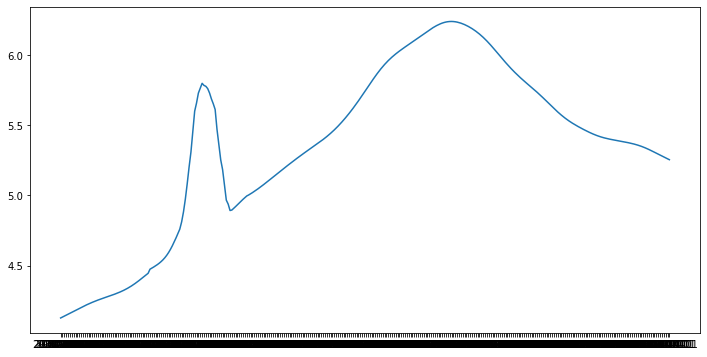

In [8]:
### Original Plot

plt.figure(figsize=(12,6))
y = plt.plot(df['Date'],df['Value'])
plt.show()

In [9]:
df['Date'].min(), df['Date'].max()

('1949-01-01', '2030-10-01')

In [10]:
df = df.sort_values('Date')
df.isnull().sum()

Date     0
Value    0
dtype: int64

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
## groupby by sum of the individual Dates

df2 = df.groupby('Date').sum().reset_index()

In [15]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [16]:
df2['Value'].min(),df2['Value'].max()

(4.12729, 6.239927)

In [17]:
### Set Date as Index

df2= df2.set_index('Date')
df2.index

DatetimeIndex(['1949-01-01', '1949-04-01', '1949-07-01', '1949-10-01',
               '1950-01-01', '1950-04-01', '1950-07-01', '1950-10-01',
               '1951-01-01', '1951-04-01',
               ...
               '2028-07-01', '2028-10-01', '2029-01-01', '2029-04-01',
               '2029-07-01', '2029-10-01', '2030-01-01', '2030-04-01',
               '2030-07-01', '2030-10-01'],
              dtype='datetime64[ns]', name='Date', length=328, freq=None)

In [18]:
df2.head()

,Value
Date,
1949-01-01,5.255053
1949-04-01,5.261516
1949-07-01,5.268013
1949-10-01,5.274564
1950-01-01,5.281182


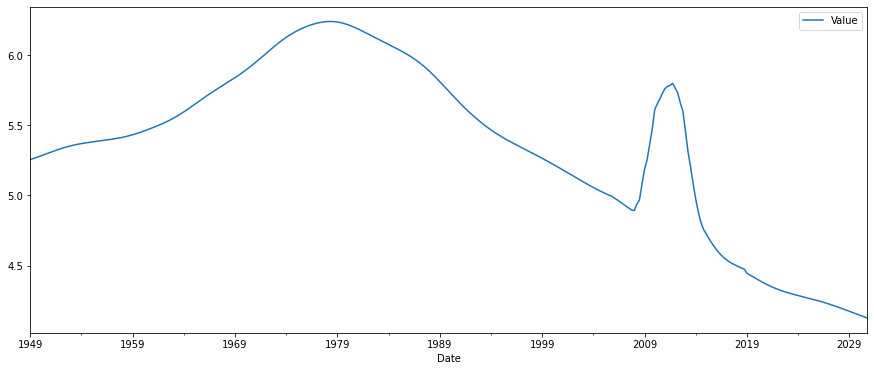

In [19]:
#### Original Plot

df2.plot(figsize=(15, 6))
plt.show()

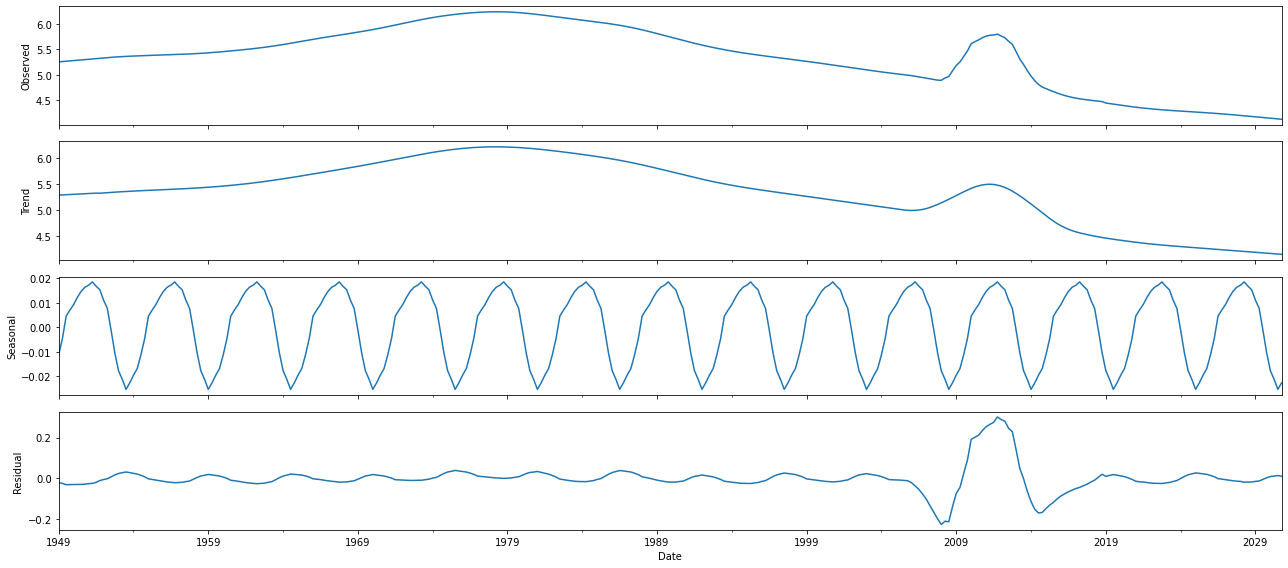

In [27]:
#### Seasonal Decomposition with the help of Sarimax

import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

from statsmodels.tsa import seasonal

decomposed1 = seasonal.seasonal_decompose(x=df2, freq=22, extrapolate_trend='freq',model = 'additive')
figsize=(15, 6)
fig = decomposed1.plot()
plt.show()

[(0, 0, 0, 16), (0, 0, 1, 16), (0, 1, 0, 16), (0, 1, 1, 16), (1, 0, 0, 16), (1, 0, 1, 16), (1, 1, 0, 16), (1, 1, 1, 16)]
ARIMA(1, 1, 1)x(1, 1, 1, 16)12 - AIC:-1443.2923131959737
                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                  328
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 723.646
Date:                Tue, 17 Nov 2020   AIC                          -1443.292
Time:                        00:33:59   BIC                          -1435.706
Sample:                    01-01-1949   HQIC                         -1440.266
                         - 10-01-2030                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000

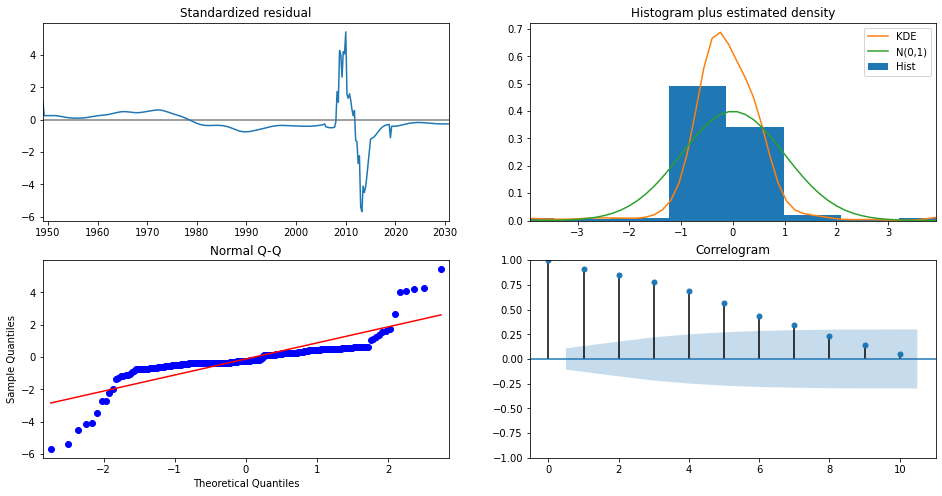

In [29]:
#### Time Series prediction with ARIMA 


p = d = q = range(0, 2)
pd = list(itertools.product(p, d, q))
seasonal_pd = [(x[0], x[1], x[2],16) for x in list(itertools.product(p, d,q))]

print(seasonal_pd)

for param in pd:
    for param_seasonal in seasonal_pd:        
        mod = sm.tsa.statespace.SARIMAX(df2['Value'])
results = mod.fit()
print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

### Fitting with the latest Value

mod = sm.tsa.statespace.SARIMAX(df2['Value'])
results = mod.fit()

print(results.summary())


#### plot_result_diagnostic statistics ##

results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [31]:
#### Getting the BEst paramters #### 



for param in pd:
    for param_seasonal in seasonal_pd:
            mod = sm.tsa.statespace.SARIMAX(df2['Value'],order=param,seasonal_order=(0,0,0,0))
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 16)12 - AIC:2037.7888587182347
ARIMA(0, 0, 0)x(0, 0, 1, 16)12 - AIC:2037.7888587182347
ARIMA(0, 0, 0)x(0, 1, 0, 16)12 - AIC:2037.7888587182347
ARIMA(0, 0, 0)x(0, 1, 1, 16)12 - AIC:2037.7888587182347
ARIMA(0, 0, 0)x(1, 0, 0, 16)12 - AIC:2037.7888587182347
ARIMA(0, 0, 0)x(1, 0, 1, 16)12 - AIC:2037.7888587182347
ARIMA(0, 0, 0)x(1, 1, 0, 16)12 - AIC:2037.7888587182347
ARIMA(0, 0, 0)x(1, 1, 1, 16)12 - AIC:2037.7888587182347
ARIMA(0, 0, 1)x(0, 0, 0, 16)12 - AIC:1591.6573317505972
ARIMA(0, 0, 1)x(0, 0, 1, 16)12 - AIC:1591.6573317505972
ARIMA(0, 0, 1)x(0, 1, 0, 16)12 - AIC:1591.6573317505972
ARIMA(0, 0, 1)x(0, 1, 1, 16)12 - AIC:1591.6573317505972
ARIMA(0, 0, 1)x(1, 0, 0, 16)12 - AIC:1591.6573317505972
ARIMA(0, 0, 1)x(1, 0, 1, 16)12 - AIC:1591.6573317505972
ARIMA(0, 0, 1)x(1, 1, 0, 16)12 - AIC:1591.6573317505972
ARIMA(0, 0, 1)x(1, 1, 1, 16)12 - AIC:1591.6573317505972
ARIMA(0, 1, 0)x(0, 0, 0, 16)12 - AIC:-1451.2341587665228
ARIMA(0, 1, 0)x(0, 0, 1, 16)12 - AIC:-1451.2341

                                 Statespace Model Results                                 
Dep. Variable:                              Value   No. Observations:                  328
Model:             SARIMAX(1, 0, 0)x(1, 1, 1, 16)   Log Likelihood                 674.474
Date:                            Tue, 17 Nov 2020   AIC                          -1340.948
Time:                                    00:36:17   BIC                          -1325.976
Sample:                                01-01-1949   HQIC                         -1334.964
                                     - 10-01-2030                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9983      0.003    291.969      0.000       0.992       1.005
ar.S.L16      -0.2898      0.037   

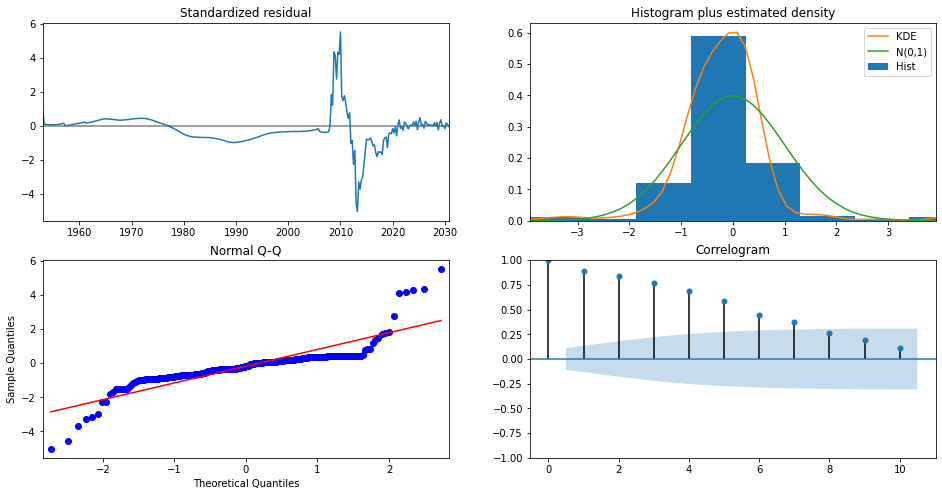

In [32]:
mod = sm.tsa.statespace.SARIMAX(df2['Value'],order=(1, 0, 0),seasonal_order=(1,1,1,16))
results = mod.fit()

print(results.summary())

results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [33]:
len(df2)

328

In [34]:
#### Get the prediction results 


pred = results.get_prediction(start=df2.index[200], dynamic=False)
pred_ci = pred.conf_int()

In [35]:
pred_ci.iloc[:,1]

1999-01-01    5.326925
1999-04-01    5.316859
1999-07-01    5.306704
1999-10-01    5.296464
2000-01-01    5.286146
                ...   
2029-10-01    4.206014
2030-01-01    4.203988
2030-04-01    4.188459
2030-07-01    4.183683
2030-10-01    4.180380
Freq: QS-OCT, Name: upper Value, Length: 128, dtype: float64

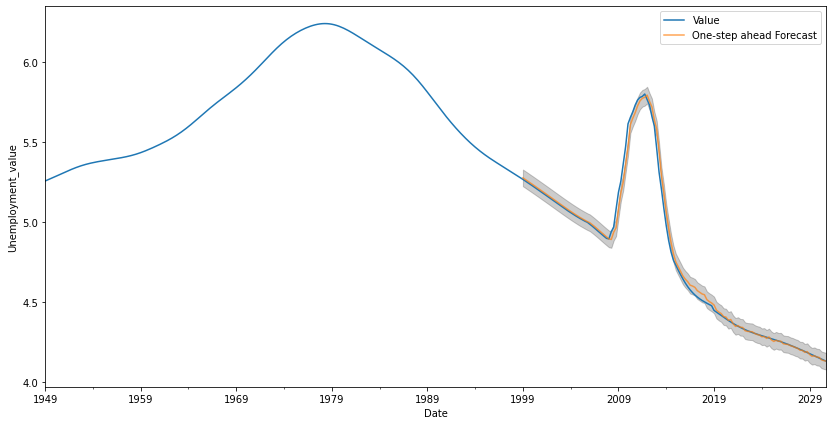

In [36]:
ax = df2['1949-01-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)


ax.set_xlabel('Date')
ax.set_ylabel('Unemployment_value')
plt.legend()
plt.show()

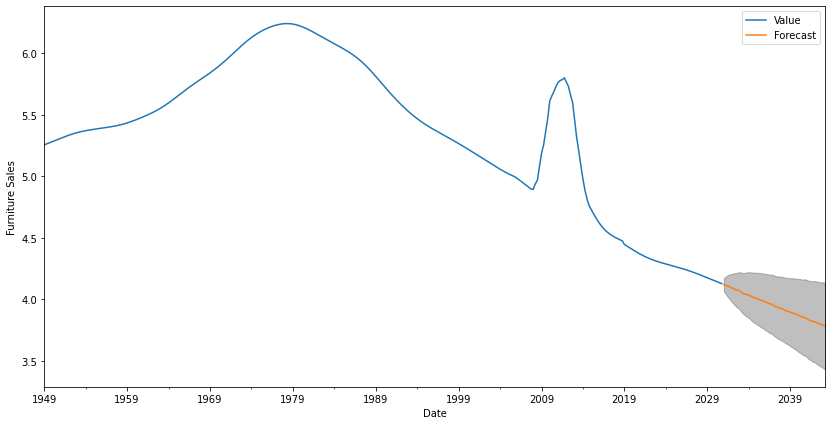

In [42]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = df2.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()